In [14]:
%matplotlib widget
import numpy as np
import scipy
from PIL import Image
import matplotlib.pyplot as plt

In [15]:
img_dir = "E:/research_data/2022_harmonic_gravity_waves/preprocessed_images/zooms/"

In [16]:
img_file = img_dir + "d20180114_t0500332_e0501573_b32203_c20220322202437972466_zoom.png"

In [17]:
img = Image.open(img_file).convert("L")

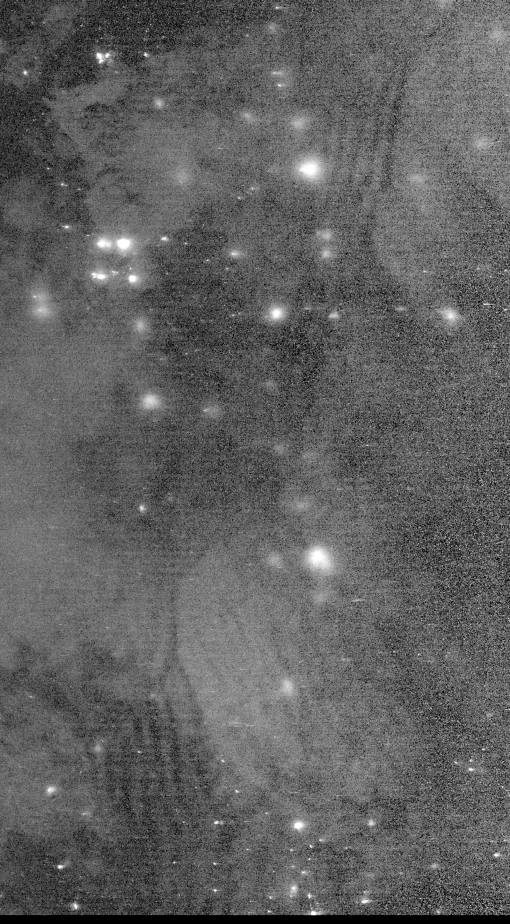

In [18]:
img

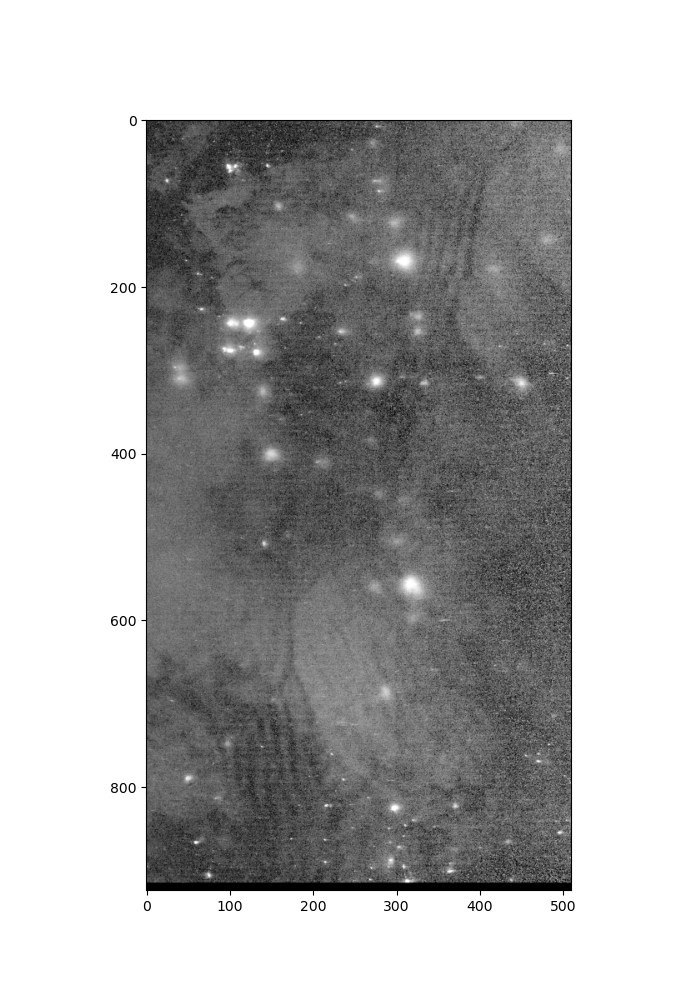

In [6]:
F, ax = plt.subplots(figsize=(7, 10))
ax.imshow(img, cmap='gray')

In [19]:
img_array = np.asarray(img)

In [20]:
img_crop = img_array[67:230, 328:414]

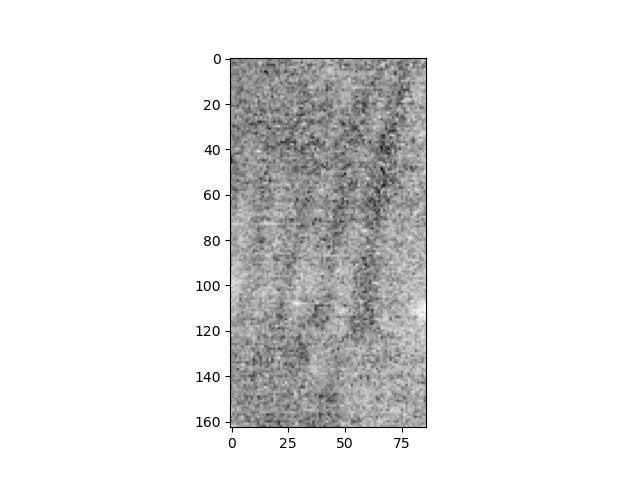

In [21]:
F, ax = plt.subplots()
ax.imshow(img_crop, cmap='gray')

In [10]:
f_img_crop = scipy.fft.fft(img_crop)

In [11]:
power_spec = (np.abs(f_img_crop))**2

In [12]:
img_crop_corr = np.abs(scipy.fft.fft(power_spec))

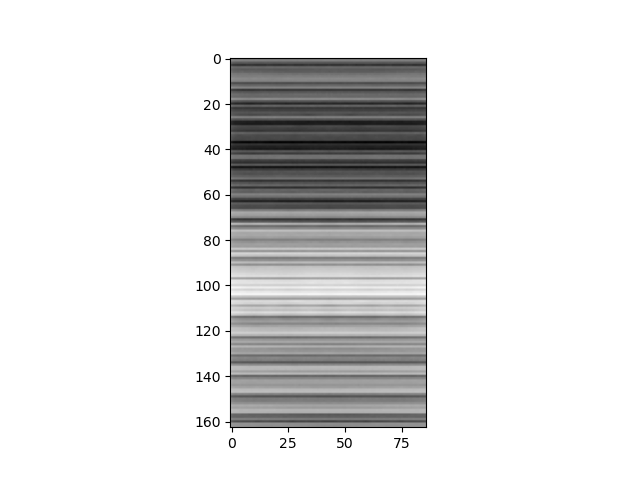

In [13]:
F, ax = plt.subplots()
ax.imshow(img_crop_corr, cmap='gray')

In [49]:
def auto_correlate(img, x, y, width, height, xrange=None, yrange=None):
    if xrange==None:
        xrange = width//2
    if yrange==None:
        yrange = height//2
        
    img_crop = img[y:y+height, x:x+width]
    
    normalizer = np.sum(img_crop * img_crop)
    
    full_xrange = range(-xrange, xrange)
    full_yrange = range(-yrange, yrange)
    
    corr_img = np.zeros((len(full_yrange), len(full_xrange)))
    
    for xt in full_xrange:
        for yt in full_yrange:
            x_ref = x + xt
            y_ref = y + yt
            img_comp = img[y_ref:y_ref+height, x_ref:x_ref+width]
            corr_img[yt, xt] = np.sum(img_comp * img_crop) / normalizer
            
    return corr_img

In [50]:
corr_img = auto_correlate(img_array, 328, 67, 86, 163, yrange=67)

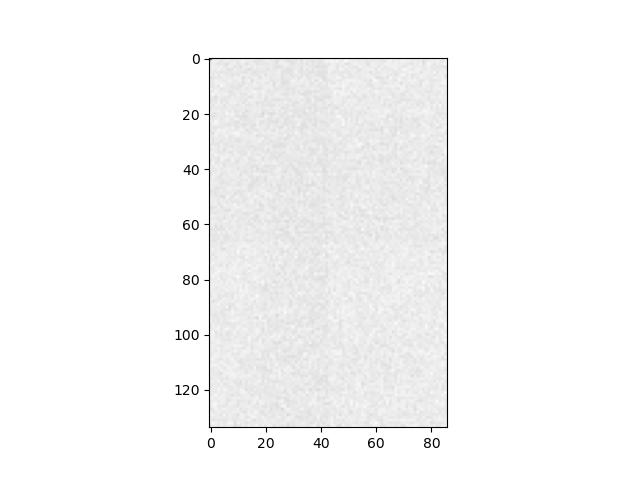

In [51]:
F, ax = plt.subplots()
ax.imshow(corr_img, cmap='gray')